<a href="https://colab.research.google.com/github/Rupsha-Chatterjee/msc_final_project/blob/main/Training_sentiment_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Packages**

In [1]:
import pandas as pd  ## offers quick, adaptable, and expressive data structures
import numpy as np  ## used to manipulate arrays
import seaborn as sns  ## uses Matplotlib as its foundation to plot graphs and is used to see random distributions
import matplotlib.pyplot as plt  ## a graphing library used for integrating charts
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  ## used to assess the accuracy of a classification algorithm's predictions. How many predictions are correct and how many are incorrect?
import re  ## used to determine whether a given text fits a given regular expression
import string
import random
#from collections import Counter
#from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# **Load Data**

In [2]:
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')
validation = pd.read_csv('/content/validation.csv')

# **Print first ten rows of the training dataset**

In [3]:
train.head(10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


# **Print the shape of all the datasets**

In [4]:
train.shape, test.shape, validation.shape

((16000, 2), (2000, 2), (2000, 2))

# **Add the label name column to the training dataset to see the different labels**

There are six different emotions: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [5]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['label_name'] = train['label'].map(labels_dict)
train.head(10)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


# **Group the data by the label name and check how many data shows each of the six emotions**

In [6]:
train.groupby(["label_name","label"]).size()

label_name  label
anger       3        2159
fear        4        1937
joy         1        5362
love        2        1304
sadness     0        4666
surprise    5         572
dtype: int64

As we can see, we have 2159 data that shows anger, 1937 data that shows fear, 5362 data that shows joy, 1304 data that shows love, 4666 data that shows sadness and 572 data that shows surprise.

# **Print a bar chart of the above count**

<Axes: xlabel='label_name'>

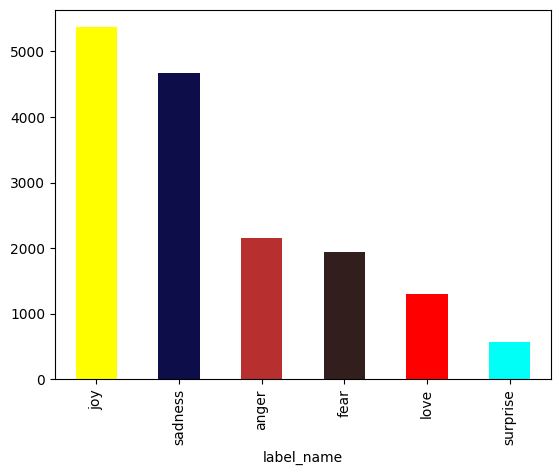

In [7]:
train["label_name"].value_counts().plot(kind='bar',color=['yellow', '#0c0d49', '#b82f2f', '#331e1e', 'red','#00fff7'])

# **Check for presence of null values in dataset**

In [8]:
print(train.isnull().sum())
print(validation.isnull().sum())
print(test.isnull().sum())

text          0
label         0
label_name    0
dtype: int64
text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


As we can see, we have no null values.

# **Clean the dataset**

In [9]:
def wordopt (text):
  text = text.lower()
  text = re.sub ('\[*?\]', '', text)
  text= re.sub("\\W", " ", text)
  text = re.sub('https?://\S+ |www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w\d\w*', '', text)
  return text

In [10]:
train['text'] = train['text'].apply(wordopt)
x = train['text']
y = train['label']

In [11]:
test['text'] = test['text'].apply(wordopt)
x1 = test['text']
y1 = test['label']

In [12]:
validation['text'] = validation['text'].apply(wordopt)
x2 = validation['text']
y2 = validation['label']

TfidfVectorizer weights the word counts by a measure of how often they appear in the dataset.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x)
xv_test = vectorization.transform(x2)

# **Train Logistic Regression model**

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Make predictions on the test set
pred_lr = LR.predict(xv_test)

# Calculate accuracy
accuracy = accuracy_score(y2, pred_lr)
print("Logistic Regression Model Accuracy: ", accuracy, "\n")

# Print classification report
print("Classification Report: \n")
print(classification_report(y2, pred_lr))

Logistic Regression Model Accuracy:  0.8595 

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       550
           1       0.84      0.95      0.89       704
           2       0.89      0.61      0.72       178
           3       0.91      0.81      0.86       275
           4       0.86      0.73      0.79       212
           5       0.85      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.86      0.86      0.85      2000



We get an accuracy of 86% using logistic regression.

# **Train Decision Tree model**

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y)

DecisionTreeClassifier()

In [17]:
pred_dt = DT.predict(xv_test)
DT.score (xv_test, y2)
print("Decision Tree Model Accuracy: ", accuracy_score(y2, pred_dt), "\n")
print("Classification Report: \n")
print(classification_report (y2, pred_dt))

Decision Tree Model Accuracy:  0.8605 

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       550
           1       0.89      0.88      0.89       704
           2       0.77      0.77      0.77       178
           3       0.85      0.87      0.86       275
           4       0.81      0.84      0.82       212
           5       0.81      0.70      0.75        81

    accuracy                           0.86      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.86      0.86      0.86      2000



We get an accuracy of 86% using decision tree.

# **Perform stemming**

Stemming is a technique used to reduce an inflected word down to its word stem.

In [18]:
all_list = train['text'].tolist() + test['text'].tolist() + validation['text'].tolist()

In [19]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(all_list)
word_index1 = tokenizer1.word_index

print("Number of words without Stemming:",len(word_index1))

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in word_index1.keys()]

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(stemmed_words)
word_index2 = tokenizer2.word_index

print("Number of words with Stemming:",len(word_index2))

Number of words without Stemming: 17096
Number of words with Stemming: 11705


In [20]:
def preprocess_data(data):
    new_data = []
    for index, row in data.iterrows():
        test_split = row['text'].split()
        stemmed_words2 = [stemmer.stem(word) for word in test_split]
        token_list= tokenizer2.texts_to_sequences([stemmed_words2])[0]
        new_data.append([token_list,row['label']])
    return new_data

In [21]:
new_train_data = preprocess_data(train)
print(train['text'][0])
print(new_train_data[0])

i didnt feel humiliated
[[3198, 3265, 220, 665], 0]


In [22]:
new_val_data = preprocess_data(validation)
print(validation['text'][0])
print(new_val_data[0])

im feeling quite sad and sorry for myself but ill snap out of it soon
[[3205, 220, 595, 1335, 3199, 3326, 3206, 3227, 3207, 1326, 518, 1283, 1274, 1276, 3380], 0]


In [23]:
# Splitting into train_X and train_y
train_X = [row[0] for row in new_train_data]
train_y = [row[1] for row in new_train_data]

# Print the results
print("train_X:", train_X[0])
print("train_y:", train_y[0])

train_X: [3198, 3265, 220, 665]
train_y: 0


In [24]:
val_X = [row[0] for row in new_val_data]
val_y = [row[1] for row in new_val_data]

print("train_X:", val_X[0])
print("train_y:", val_y[0])

train_X: [3205, 220, 595, 1335, 3199, 3326, 3206, 3227, 3207, 1326, 518, 1283, 1274, 1276, 3380]
train_y: 0


# **Calculate the length of the longest sentence in the dataset**

In [25]:
length_of_longest_sentence = len(max(train_X, key=len))
print(length_of_longest_sentence)
print(max(train_X, key=len))

66
[3198, 613, 3250, 3588, 3217, 3204, 3198, 927, 3245, 1497, 3245, 1354, 3217, 3245, 1303, 1296, 3200, 2107, 1284, 1276, 3220, 220, 3598, 3213, 220, 1276, 3528, 3217, 7890, 4263, 3221, 5569, 1552, 3243, 3198, 4263, 3221, 1552, 5570, 5570, 3198, 3579, 5569, 3198, 7891, 1276, 3200, 3202, 1293, 3219, 1401, 3948, 3598, 3213, 3223, 239, 3528, 3213, 85, 3267, 579, 1658, 3206, 3201, 239, 1289]


In [26]:
for i in range(len(train_X)):
    for j in range(length_of_longest_sentence-len(train_X[i])):
        train_X[i].append(0)

for i in range(len(val_X)):
    for j in range(length_of_longest_sentence-len(val_X[i])):
        val_X[i].append(0)

In [27]:
train_X = np.array(train_X)
train_y = np.array(train_y)
val_X = np.array(val_X)
val_y = np.array(val_y)

print(train_X.shape,train_y.shape)
print(val_X.shape,val_y.shape)

(16000, 66) (16000,)
(2000, 66) (2000,)


In [28]:
# Convert labels to one-hot encoding
train_y_one_hot = to_categorical(train_y, num_classes=16000)
val_y_one_hot = to_categorical(val_y, num_classes=16000)

to_categorical is a utility function which allows us to convert integer targets into categorical and hence one-hot encoded ones.

# **Train LSTM model**

In [29]:
model = Sequential()
model.add(Embedding(16000, 100, input_length=66))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(16000, activation='softmax'))
adam = Adam(learning_rate=0.01)  # Replace lr with learning_rate
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train_X, train_y_one_hot, epochs=25, verbose=1, validation_data=(val_X, val_y_one_hot))
#print model.summary()
print(model)

Epoch 1/25
500/500 [==============================] - 247s 481ms/step - loss: 1.7706 - accuracy: 0.2993 - val_loss: 1.6287 - val_accuracy: 0.2750
Epoch 2/25
500/500 [==============================] - 176s 353ms/step - loss: 1.6375 - accuracy: 0.3174 - val_loss: 1.6334 - val_accuracy: 0.3525
Epoch 3/25
500/500 [==============================] - 240s 480ms/step - loss: 1.6057 - accuracy: 0.3215 - val_loss: 1.5741 - val_accuracy: 0.3515
Epoch 4/25
500/500 [==============================] - 181s 363ms/step - loss: 1.5354 - accuracy: 0.3451 - val_loss: 1.4276 - val_accuracy: 0.3715
Epoch 5/25
500/500 [==============================] - 190s 379ms/step - loss: 1.2177 - accuracy: 0.4977 - val_loss: 1.0742 - val_accuracy: 0.6055
Epoch 6/25
500/500 [==============================] - 175s 351ms/step - loss: 0.9276 - accuracy: 0.6416 - val_loss: 0.8754 - val_accuracy: 0.6485
Epoch 7/25
500/500 [==============================] - 175s 351ms/step - loss: 0.7689 - accuracy: 0.7015 - val_loss: 0.7148 -

# **Calculate the accuracy of LSTM model**

In [30]:
last_accuracy = "{:.3f}".format(history.history['accuracy'][-1])
print("Training Accuracy:", last_accuracy)

Training Accuracy: 0.915


ACCURACY GRAPH

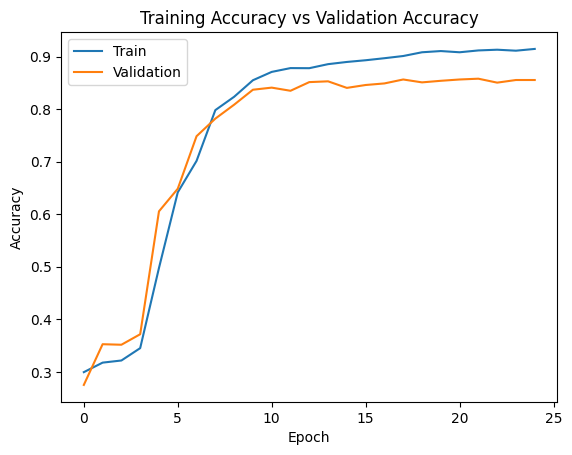

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

LOSS GRAPH

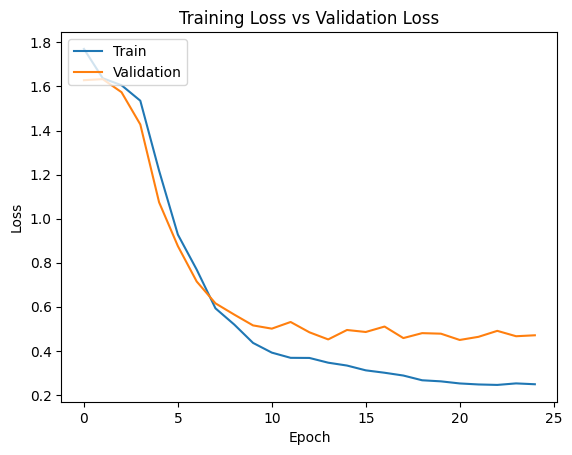

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Saving the LSTM model and tokenizer**

In [53]:
#from keras.models import load_model

model.save('model.h5')  # creates a HDF5 file 'my_model.h5'

    # returns a compiled model
    # identical to the previous one
#model = load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
import io, json
tokenizer_json = tokenizer2.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))